# Task 3

In [1]:
from vector_fields import read_vectorfield_data, estimate_vectors, solve_trajectory, create_phase_portrait_matrix, create_phase_portrait_derivative, find_best_rbf_configuration
from function_approximation import approx_lin_func, approx_nonlin_func, plot_func_over_data,  get_points_and_targets, compute_bases, linear_approx, rbf_approx
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.spatial.distance import cdist
import numpy as np
import math

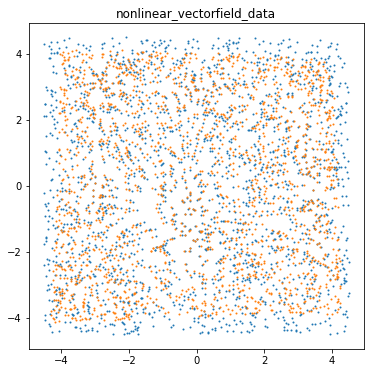

In [2]:
# read the vector field data
x0, x1 = read_vectorfield_data(base_filename="nonlinear_vectorfield_data")
fig, ax = plt.subplots(1,1,figsize=(6,6))
ax.scatter(x0[:,0], x0[:,1], s=1)
ax.scatter(x1[:,0], x1[:,1], s=1)
ax.set_title("nonlinear_vectorfield_data")
plt.show()

### Part 1
Try to approximate the vector field using linear approximation

In [3]:
# utilize delta_t, find delta_t giving lowest possible mse
dt = 0.1
end_time=0.5
plt.rcParams["figure.figsize"] = (14,14)
v = estimate_vectors(dt, x0, x1)
A, res, _, _ = approx_lin_func(data=(x0,v))
print("Residual error:",res)
x1_pred, best_dt, best_mse = solve_trajectory(x0, x1, linear_approx, args=[A], find_best_dt=True, end_time=end_time, plot=False)
print(f"MSE value at {end_time} is: {np.linalg.norm(x1_pred-x1)**2 / x1.shape[0]}\n Best MSE value is found at time {best_dt} with MSE: {best_mse}")

Residual error: [3890.04548426 3563.97075073]
MSE value at 0.5 is: 0.2015206821878147
 Best MSE value is found at time 0.10101010101010102 with MSE: 0.037288166883552555


Residual error: [3890.04548426 3563.97075073]


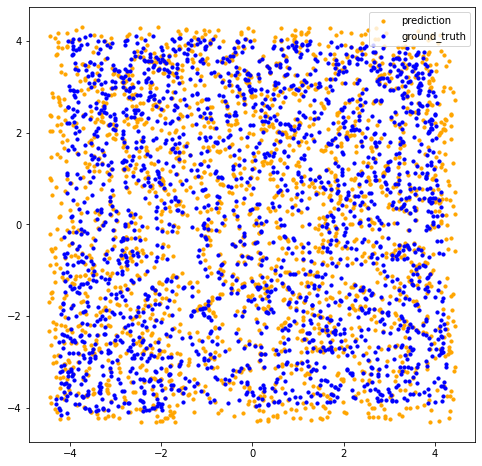

MSE value at 0.10101010101010102 is: 0.03728816688433024


In [4]:
# utilize best delta_t, plot results
dt = 0.1
end_time=best_dt
plt.rcParams["figure.figsize"] = (8,8)
v = estimate_vectors(dt, x0, x1)
A, res, _, _ = approx_lin_func(data=(x0,v))
print("Residual error:",res)
x1_pred, _, _ = solve_trajectory(x0, x1, linear_approx, args=[A], find_best_dt=False, end_time=end_time, plot=False)
plt.scatter([el[0] for el in x1_pred], [el[1] for el in x1_pred], c='orange', s=10, label='prediction')
plt.scatter(x1[:,0], x1[:,1], c='blue', s=10, label='ground_truth')
plt.legend()
plt.show()
print(f"MSE value at {end_time} is: {np.mean(np.linalg.norm(x1_pred-x1, axis=1)**2)}")

Eigenvalues of A:  [-0.10022625 -0.43260525]


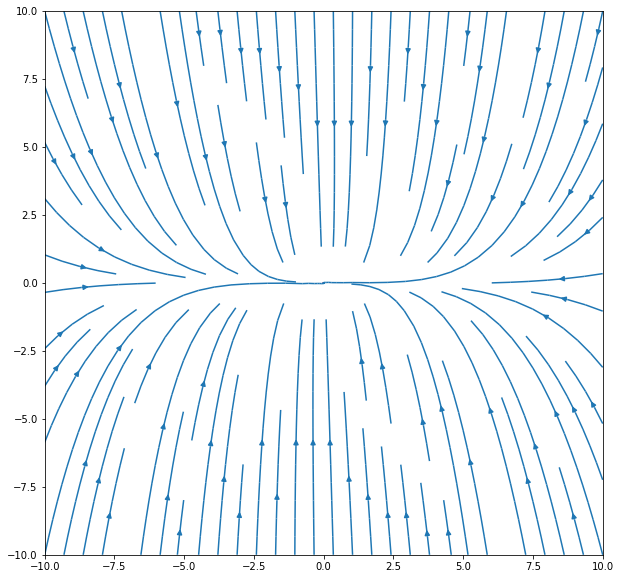

In [5]:
create_phase_portrait_matrix(A, title_suffix="stable node", display=False)

### Part 2
Try to approximate the vector field using radial basis functions (with the number of centers between
100 and 1000)

In [6]:
# find best configuration
final_best_mse, eps, n_bases, final_best_dt, centers = find_best_rbf_configuration(x0,x1)

Printing best configuration: eps = 5.0 - n_bases = 479 - dt = 0.11111111111111112 giving MSE = 0.0003140181374004727


Residual error: []


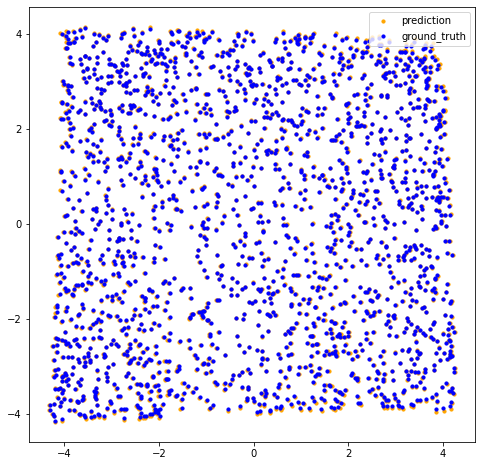

In [7]:
# utilize best delta_t, plot results
dt = 0.1
end_time=final_best_dt
plt.rcParams["figure.figsize"] = (8,8)
v = estimate_vectors(dt, x0, x1)
C, res, _, _, _, eps, phi = approx_nonlin_func(data=(x0,v), n_bases=n_bases, eps=eps, centers=centers)
print("Residual error:",res)
x1_pred, _, _ = solve_trajectory(x0, x1, rbf_approx, find_best_dt=False, end_time=end_time, args=[centers, eps, C], plot=False)
plt.scatter([el[0] for el in x1_pred], [el[1] for el in x1_pred], c='orange', s=10, label='prediction')
plt.scatter(x1[:,0], x1[:,1], c='blue', s=10, label='ground_truth')
plt.legend()
plt.show()

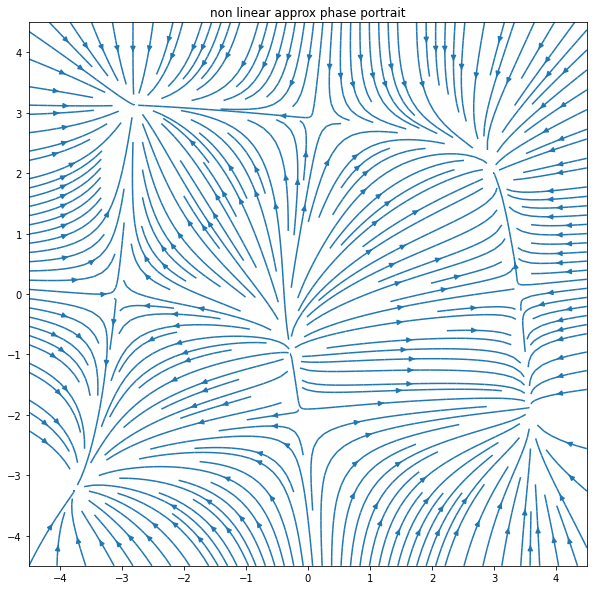

In [8]:
# show phase portrait for best configuration
create_phase_portrait_derivative(rbf_approx, args=[centers, eps, C], title_suffix="non linear approx phase portrait", display=False)

### Part 3
use the approximated vector field to solve the system for a larger time,
with all initial points x0

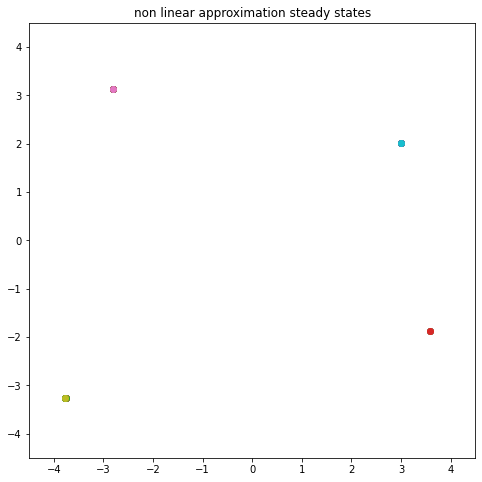

In [9]:
end_time = 50
plt.title("non linear approximation steady states")
for i in range(len(x0)):
    sol = solve_ivp(rbf_approx, [0, end_time],  x0[i], args=[centers, eps, C])
    plt.scatter(sol.y[0,-1], sol.y[1,-1])
plt.xlim(-4.5, 4.5)
plt.ylim(-4.5, 4.5)
plt.show()